In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker="CL=F"

import pandas as pd 

data=yf.download(ticker, start='2023-07-19', end='2023-07-20', interval='30m')

data.head()

x=data['Close']

type(x)

y=x.values
type(y)


[*********************100%***********************]  1 of 1 completed


numpy.ndarray

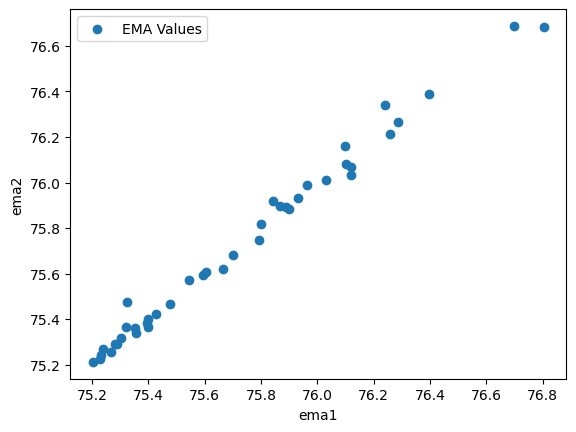

In [5]:
# create a dataframe
stockValues = pd.DataFrame(
    {'Stock_Values': y })
 
# finding EMA
# use any constant value that results in
# good smoothened curve
ema1 = stockValues.ewm(com=0.09).mean()
ema2 = stockValues.ewm(com=0.40).mean()
# Comparison plot b/w stock values & EMA
#plt.plot(stockValues, label="Stock Values")
plt.scatter(ema1, ema2, label="EMA Values")

plt.xlabel("ema1")
plt.ylabel("ema2")
plt.legend()
plt.show()

In [6]:
new=pd.DataFrame(ema1)
new['ema2']=ema2
new.rename(columns={'Stock_Values':'ema1'} )
new['const']=1
X=['const','ema2']
Y=[new['Stock_Values']]


                            OLS Regression Results                            
Dep. Variable:                   ema2   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3562.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           6.03e-40
Time:                        08:19:54   Log-Likelihood:                 71.356
No. Observations:                  41   AIC:                            -138.7
Df Residuals:                      39   BIC:                            -135.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5640      1.226      2.092   

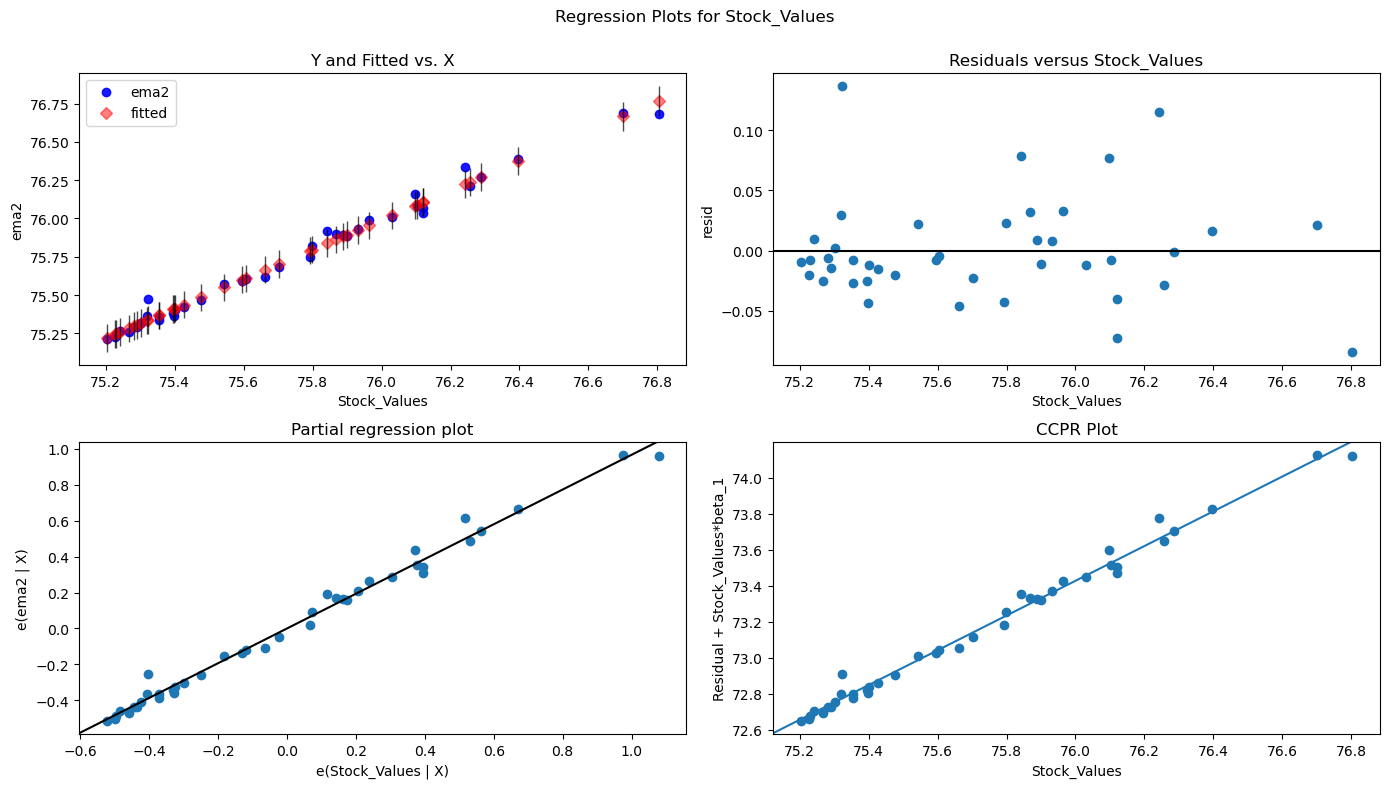

In [7]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# reading the csv file
# data = pd.read_csv('headbrain3.csv')
  
# fit simple linear regression model
linear_model = ols("ema2 ~ Stock_Values", data=new).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    1,
                                    fig=fig)

In [8]:
ans=linear_model.resid

In [9]:
ans

0    -0.011467
1    -0.014907
2    -0.019838
3    -0.046160
4    -0.004177
5    -0.022414
6     0.022162
7    -0.007984
8    -0.042677
9    -0.072457
10   -0.007949
11    0.032610
12    0.032371
13    0.008680
14    0.022997
15   -0.011249
16   -0.040465
17   -0.028106
18   -0.001053
19   -0.083864
20    0.021325
21    0.115259
22    0.016038
23    0.076590
24    0.078199
25    0.008145
26   -0.011589
27    0.136452
28    0.029581
29    0.001827
30   -0.006315
31   -0.014267
32   -0.027106
33   -0.024932
34   -0.007452
35    0.009870
36   -0.007475
37   -0.009108
38   -0.020293
39   -0.025427
40   -0.043377
dtype: float64

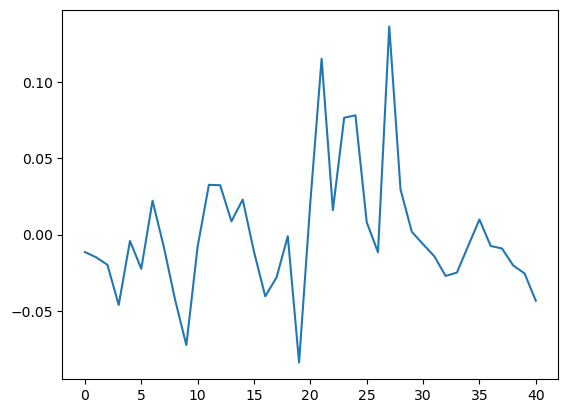

In [10]:
plt.plot(ans)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
result = adfuller(ans)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.328283
p-value: 0.000397
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


In [13]:
import math 
spread= (ema1)-linear_model.params[1]* (ema2)

In [14]:
import scipy.stats as stats

res=stats.zscore(spread)

In [15]:
res

,Stock_Values,const,ema2
0,-0.213112,NaN,NaN
1,-0.108991,NaN,NaN
2,0.051347,NaN,NaN
3,0.815022,NaN,NaN
4,-0.079836,NaN,NaN
5,0.404047,NaN,NaN
6,-0.674390,NaN,NaN
7,-0.018914,NaN,NaN
8,0.920384,NaN,NaN
9,1.940115,NaN,NaN


In [16]:
tempo=res["Stock_Values"].iloc[1]
tempo


-0.10899141864342482

In [17]:
ema1


,Stock_Values,ema2,const
0,75.400002,75.400002,1
1,75.427712,75.423334,1
2,75.475713,75.464779,1
3,75.663141,75.619540,1
4,75.605212,75.605555,1
5,75.701347,75.680199,1
6,75.544147,75.572896,1
7,75.595387,75.592256,1
8,75.792277,75.747788,1
9,76.120465,76.035084,1


In [18]:
L_sample=[]
for i in res["Stock_Values"]: 
    if( -2< i <2):
        continue
    else: 
        L_sample.append(i)
L_sample

[3.0780928734178, -3.1945854510354397]

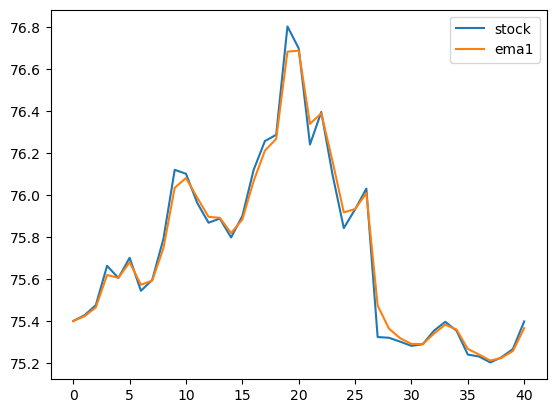

In [19]:
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["stock","ema1","ema2"])

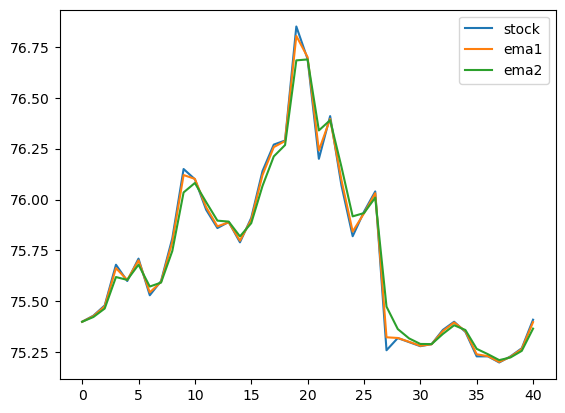

In [20]:
def temp():
    plt.plot(range(0,len(data)),data['Close'])

    plt.plot(ema1["Stock_Values"])
    plt.plot((ema2))
    plt.legend(["stock","ema1","ema2"])
temp()

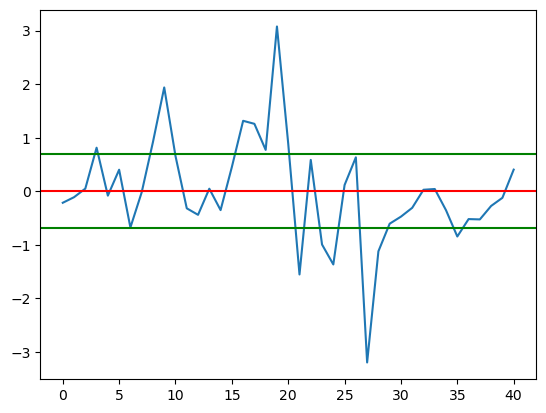

In [21]:
plt.plot(res)
plt.axhline(y=0, c='r')
plt.axhline(y=0.69, c='g', linestyle='-')
plt.axhline(y=-0.69, c='g', linestyle='-')

In [22]:
import numpy as np
import math
abs(res["Stock_Values"]).mean()
           


0.704159180213936

In [23]:
import mplfinance as fplt

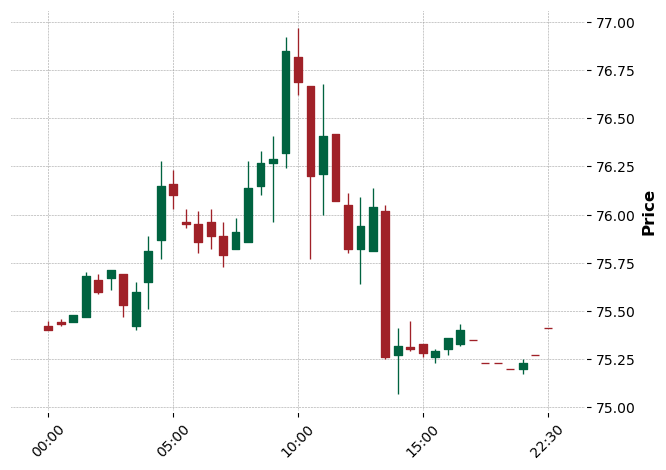

In [24]:
fplt.plot(data,
         type="candle"
         , style="charles" )


In [25]:
L_sam=[]
count=0
for i in res['Stock_Values']: 
    count=count+1
        

    if(-2<i<2): 
        continue
    else: 
        L_sam.append((count,i))
   
    

In [26]:
L_sam

[(20, 3.0780928734178), (28, -3.1945854510354397)]

In [27]:
point=pd.DataFrame(data=L_sam)
point[0]

0    20
1    28
Name: 0, dtype: int64

In [28]:
data["Close"].iloc[32]

75.36000061035156

point


In [29]:
signal=[]
for i in range(0,len(res)): 
    if( i in point[0].values): 
        signal.append(data["Close"].iloc[i])
    else:
        signal.append(np.nan)
        

In [30]:
signal

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 76.69000244140625,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 75.31999969482422,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [31]:
apd=fplt.make_addplot(signal, type='scatter')


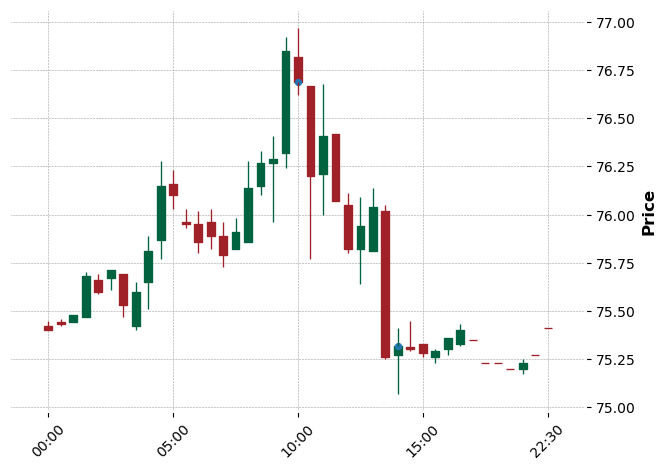

In [32]:
fplt.plot(data,
         type="candle"
         , style="charles",addplot=apd)

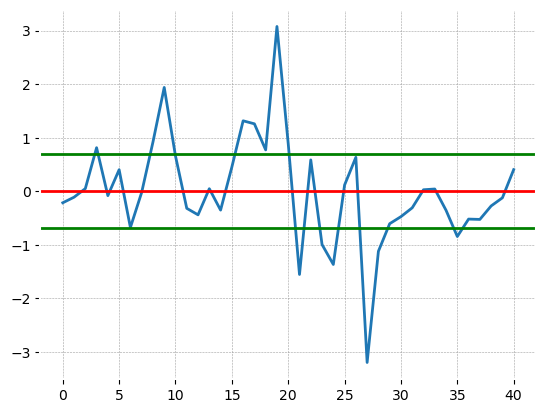

In [33]:
plt.plot(res)
plt.axhline(y=0, c='r')
plt.axhline(y=0.69, c='g', linestyle='-')
plt.axhline(y=-0.69, c='g', linestyle='-')

In [34]:
def slope(y2,x2,y1,x1):
    m=(y2-y1)/(x2-x1)
    return m

slope_value=[]
for i in range(0,len(res)-1):
    i+=1
    v=slope(res["Stock_Values"].iloc[i], i, res["Stock_Values"].iloc[i-1], i-1)
    slope_value.append(v)
    

In [35]:
slope_value

[0.10412026036123148,
 0.16033812821862445,
 0.7636750748574088,
 -0.894857381594776,
 0.48388258326340144,
 -1.0784367380405804,
 0.6554758911470031,
 0.9392979945138968,
 1.0197306143312594,
 -1.2807752986390375,
 -0.9760619819973172,
 -0.12148293862605047,
 0.4876138231265593,
 -0.39950387616455274,
 0.8042281554219038,
 0.8629831301764035,
 -0.056328571337745936,
 -0.4867462723341319,
 2.3040519557389563,
 -2.1870973959330904,
 -2.442699037682198,
 2.1388862620335702,
 -1.5797208698488872,
 -0.37200338565086555,
 1.48305882061452,
 0.5169791795020894,
 -3.8300818974883786,
 2.075632914366925,
 0.5152361636689322,
 0.131814324028854,
 0.16487186997713676,
 0.3368549128962052,
 0.014065905588268406,
 -0.39708613508484736,
 -0.4894670189283387,
 0.3250256512132623,
 -0.006173827601786641,
 0.2514925414778252,
 0.1519143749410115,
 0.5259281659108681]

In [44]:
ans_s1=[]
ans_s2=[]
for i in range(0,len(slope_value)-1):
    if( slope_value[i]<0and i>0 and slope_value[i-1]>0): 
        ans_s1.append(i)
    elif (slope_value[i]>0and i>0 and slope_value[i-1]<0):
        ans_s2.append(i)
        

In [46]:
ans_s1
ans_s2

[4, 6, 12, 14, 18, 21, 24, 27, 35, 37]

In [52]:
demo1=[]
demo2=[]
for i in range(0,len(res)): 
    if( i in ans_s1): 
        demo1.append(data["Close"].iloc[i])
        demo2.append(np.nan)
    elif( i in ans_s2):
        demo2.append(data["Close"].iloc[i])
        demo1.append(np.nan)
    else:
        demo1.append(np.nan)
        demo2.append(np.nan)

In [53]:
demo1

[nan,
 nan,
 nan,
 75.68000030517578,
 nan,
 75.70999908447266,
 nan,
 nan,
 nan,
 76.1500015258789,
 nan,
 nan,
 nan,
 75.88999938964844,
 nan,
 nan,
 76.13999938964844,
 nan,
 nan,
 76.8499984741211,
 nan,
 nan,
 76.41000366210938,
 nan,
 nan,
 nan,
 76.04000091552734,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 75.4000015258789,
 nan,
 nan,
 75.2300033569336,
 nan,
 nan,
 nan,
 nan]

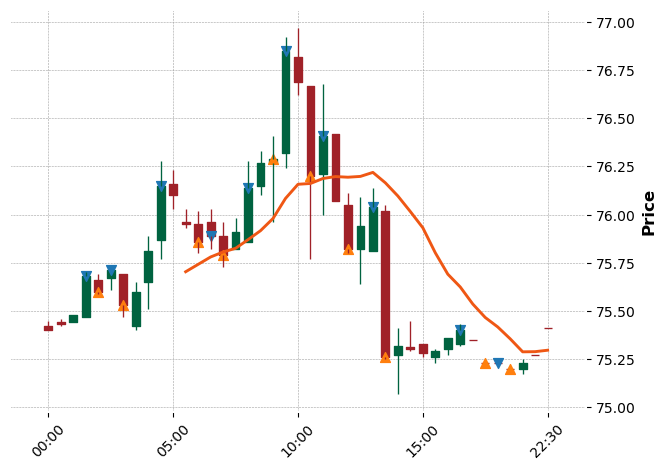

In [55]:
apd=[fplt.make_addplot(demo1, type='scatter', markersize=50, marker='v'),fplt.make_addplot(demo2, type='scatter', markersize=50, marker='^')]
fplt.plot(data,
         type="candle"
         , style="charles",addplot=apd, mav=12)